In [1]:
%pylab notebook
import os
import sys
import numpy as np
import matplotlib
import serial
import pyvisa
import struct as struct
from time import sleep, time
from pylab import *
from datetime import datetime

from scipy.special import jv
import csv
import numpy as np
import pylab as plt
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


Populating the interactive namespace from numpy and matplotlib


In [8]:
#OPEN ARDUINO
ser = serial.Serial('COM4', 9800, timeout=1)

In [9]:
def readCurrent():
    ser.write(b'C')
    value = ser.readline()
    return(float(value))
def readVoltage():
    ser.write(b'V')
    value = ser.readline()
    return(float(value))
def readPower():
    ser.write(b'P')
    value = ser.readline()
    return(float(value))
def readTemp():
    ser.write(b'T')
    value = ser.readline()
    return(float(value))
def readCurrent2():
    ser.write(b'c')
    value = ser.readline()
    return(float(value))
def readVoltage2():
    ser.write(b'v')
    value = ser.readline()
    return(float(value))
def readPower2():
    ser.write(b'p')
    value = ser.readline()
    return(float(value))



Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'fft', 'random', 'linalg', 'power']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


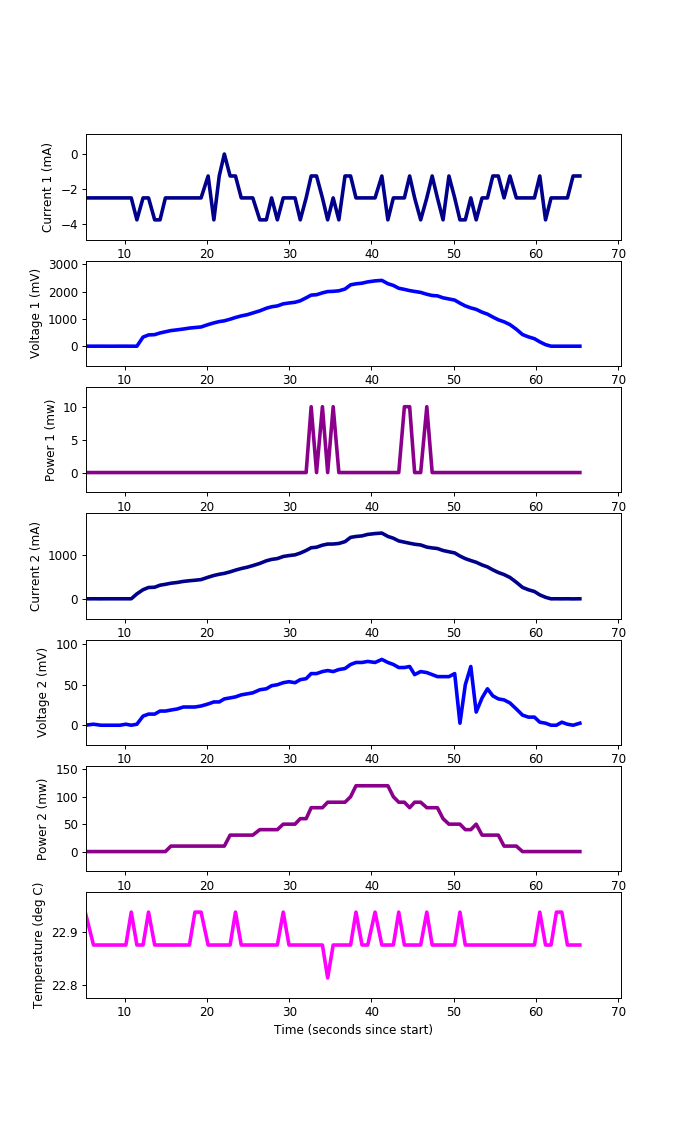

Text(0, 0.5, 'Temperature (deg C)')

In [4]:
%pylab notebook
tstart = time.time()

x_array = [time.time()-tstart]
y_array_C = [readCurrent()]
y_array_V = [readVoltage()]
y_array_P = [readPower()]
y_array_c = [readCurrent2()]
y_array_v = [readVoltage2()]
y_array_p = [readPower2()]
y_array_T = [readTemp()]


fig = plt.figure(figsize = (8,13), frameon=False)

ax1=plt.subplot(7,1,1)
p1, = ax1.plot(x_array,y_array_C, label='Current 1',lw=3,color='darkblue')

ax2=plt.subplot(7,1,2)
p2, = ax2.plot(x_array,y_array_V, label='Voltage 1',lw=3,color='blue')

ax3=plt.subplot(7,1,3)
p3, = ax3.plot(x_array,y_array_P, label='Power 1',lw=3,color='darkmagenta')

ax4=plt.subplot(7,1,4)
p4, = ax4.plot(x_array,y_array_c, label='Current 2',lw=3,color='darkblue')

ax5=plt.subplot(7,1,5)
p5, = ax5.plot(x_array,y_array_v, label='Voltage 2',lw=3,color='blue')

ax6=plt.subplot(7,1,6)
p6, = ax6.plot(x_array,y_array_p, label='Power 2',lw=3,color='darkmagenta')

ax7=plt.subplot(7,1,7)
p7, = ax7.plot(x_array,y_array_T, label='Temperature',lw=3,color='magenta')

ax7.set_xlabel('Time (seconds since start)')
ax1.set_ylabel('Current 1 (mA)')
ax2.set_ylabel('Voltage 1 (mV)')
ax3.set_ylabel('Power 1 (mw)')
ax4.set_ylabel('Current 2 (mA)')
ax5.set_ylabel('Voltage 2 (mV)')
ax6.set_ylabel('Power 2 (mw)')
ax7.set_ylabel('Temperature (deg C)')

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


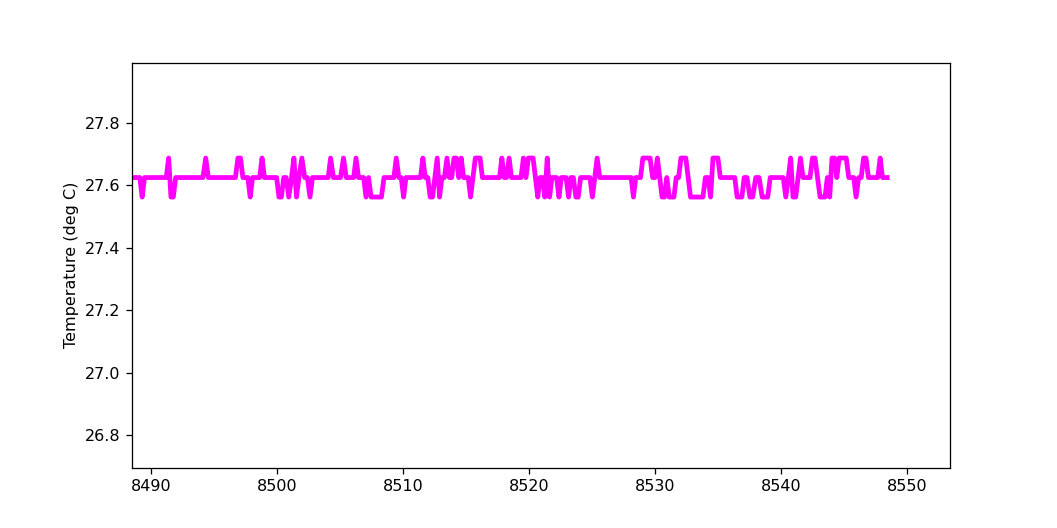

Text(0, 0.5, 'Temperature (deg C)')

In [10]:
%pylab notebook
tstart = time.time()

x_array = [time.time()-tstart]
y_array_T = [readTemp()]


fig = plt.figure(figsize = (8,4), frameon=False)

ax7=plt.subplot(1,1,1)
p7, = ax7.plot(x_array,y_array_T, label='Temperature',lw=3,color='magenta')


ax7.set_ylabel('Temperature (deg C)')

In [ ]:
while True:
    C_buffer = []
    T_buffer = []
    V_buffer = []
    P_buffer = []
    v_buffer = []
    p_buffer = []
    c_buffer = []

    n=1
    
    for i in range(n):            
        T_buffer.append(readTemp())
        sleep(0.1)

    x_array.append(time.time()-tstart)    
    y_array_T.append(mean(T_buffer))
    
    ymax7 = max(y_array_T)
    ymin7 = min(y_array_T)
    xmax = max(x_array)
    
    ax7.set_xlim(xmax - 60,xmax+5)
    
    fig.canvas.draw()
    offset = 0.3

    ax7.set_ylim(ymin7-(ymax7-ymin7)*offset,ymax7+(ymax7-ymin7)*offset)
    p7.set_ydata(y_array_T)
    p7.set_xdata(x_array)
    

In [27]:
y_array_v

[-3.75, -4.375, -4.125, -4.125, -4.5, -4.75]

In [6]:
#save('20200812_2150_time.npy', x_array)
#save('20200812_2150_current2.npy', y_array_c)
#save('20200812_2150_temp.npy', y_array_T)
#save('20200812_2150_voltage1.npy', y_array_V)
#save('20200812_2150_voltage2.npy', y_array_v)
#save('20200812_2150_power.npy', y_array_P)

In [2]:
x_array = load('20200808_2254_time.npy')
y_array_C = load('20200808_2254_current.npy')
y_array_T = load('20200808_2254_temp.npy')
y_array_V = load('20200808_2254_voltage.npy')
y_array_P = load('20200808_2254_power.npy')

In [10]:
tstart = time.time()

x_array = [(time.time()-tstart)/3600]
y_array_T = [readTemp()]

fig = plt.figure(figsize = (8,4), frameon=False)

ax1=plt.subplot(1,1,1)

ax1.set_xlabel('Time Passed (hours)')
ax1.set_ylabel('Temperature (degrees Celcius)')

p1, = ax1.plot(x_array,y_array_T, label='Temperature',lw=2,color='darkblue')

ValueError: could not convert string to float: 

In [ ]:
while True:
    x_array.append((time.time()-tstart)/3600)
    y_array_T.append(readTemp())
    

    ymax1 = max(y_array_T)
    ymin1 = 0
    xmax = max(x_array)
    
    ax1.set_xlim(-1/60,xmax+5/3600)
    
    fig.canvas.draw()
    offset = 0.3
    ax1.set_ylim(ymin1-(ymax1-ymin1)*offset,ymax1+(ymax1-ymin1)*offset)
    p1.set_ydata(y_array_T)
    p1.set_xdata(x_array)
    
    sleep(60)
    

In [22]:
print("Voltage (mV): " + str(mean(y_array_V)))
print("Current (mA): " + str(mean(y_array_C)))
print("Power (mW): " + str(mean(y_array_P)))
print("Temp (C): " + str(mean(y_array_T)))

Voltage (mV): 3322.032284768212
Current (mA): -2.1399006622516556
Power (mW): 7.3509933774834435
Temp (C): 23.072847682119207


In [18]:
y_array_C = []
y_array_V = []
y_array_P = []
y_array_T = []

for i in range(50):
    y_array_C.append(readCurrent())
    y_array_V.append(readVoltage())
    y_array_P.append(readPower())
    y_array_T.append(readTemp())


print("Voltage (mV): " + str(mean(y_array_V)))
print("Current (mA): " + str(mean(y_array_C)))
print("Power (mW): " + str(mean(y_array_P)))
print("Temp (C): " + str(mean(y_array_T)))

Voltage (mV): -1.575
Current (mA): 24.59125
Power (mW): 46.325
Temp (C): 0.0


In [2]:
import csv

data = np.zeros((62,5))

with open('D401_PD3.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        
        data[line_count,:] = row[1:6]
        line_count += 1

    print(f'Processed {line_count} lines.')

Processed 62 lines.


In [185]:
PD30P1 = []
PD30P2 = []
PD30P5 = []
PD10P1 = []
PD10P2 = []
PD10P5 = []
PD20P1 = []
PD20P2 = []
PD20P5 = []

for i in range(62):
    #PD3
    if data[i,0] == float(1):
        if data[i,1] == float(0.1):
            PD30P1.append(data[i,2:5].tolist())
        if data[i,1] == float(0.2):
            PD30P2.append(data[i,2:5].tolist())
        if data[i,1] == float(0.5):
            PD30P5.append(data[i,2:5].tolist())
    #PD1
    elif data[i,0] == 2:
        if data[i,1] == 0.1:
            PD10P1.append(data[i,2:5].tolist())
        if data[i,1] == 0.2:
            PD10P2.append(data[i,2:5].tolist())
        if data[i,1] == 0.5:
            PD10P5.append(data[i,2:5].tolist())
    #PD2
    elif data[i,0] == 3:
        if data[i,1] == 0.1:
             PD20P1.append(data[i,2:5].tolist())
    
        if data[i,1] == 0.2:
             PD20P2.append(data[i,2:5].tolist())
            
        if data[i,1] == 0.5:
             PD20P5.append(data[i,2:5].tolist())
    

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


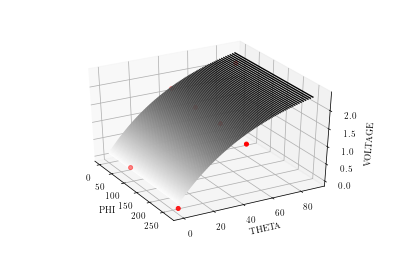

In [216]:
%pylab notebook


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def f(theta, a, b, c):
    return a*exp(-b*theta)+c


x_surf =  linspace(0,270, 1000)
y_surf = linspace(0,90, 1000)

x =array(PD10P1)[:,1]
y =array(PD10P1)[:,0]
z =array(PD10P1)[:,2]/1000

X, Y = np.meshgrid(x_surf, y_surf)
Z = f(Y, -2.63156588,  0.02005644,  2.76779088)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.contour3D(X, Y, Z, 200, cmap='binary')





ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('PHI')
ax.set_ylabel('THETA')
ax.set_zlabel('VOLTAGE')

plt.show()

<IPython.core.display.Javascript object>


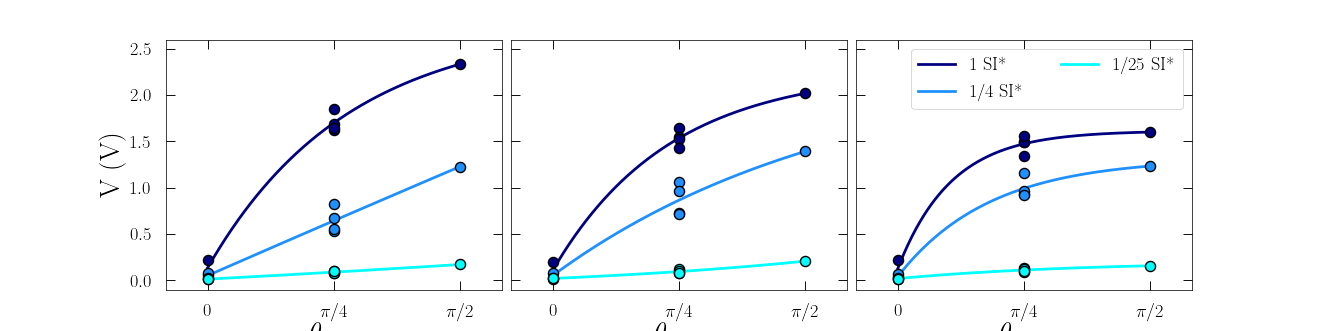

In [213]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 15


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=30

#format axis labels
x_locator = FixedLocator([0,45,90])
x_formatter = FixedFormatter([0,r'$\pi/4$',r'$\pi/2$'])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

fig.subplots_adjust(hspace=0.025, wspace=0.025)

fig.set_facecolor('w')
for i in range(0,len(axes)):
    axes[i].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].xaxis.set_major_formatter(x_formatter)
    axes[i].xaxis.set_major_locator(x_locator)
#     axes[i,j].yaxis.set_major_formatter(y_formatter)
#     axes[i,j].yaxis.set_major_locator(y_locator)
    axes[i].set_xlim(-15,105)
    axes[i].set_ylim(-0.1,2.6)
    
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
        
PD30P1 = array(PD30P1)[numpy.argsort(array(PD30P1)[:, 0])]
PD30P2 = array(PD30P2)[numpy.argsort(array(PD30P1)[:, 0])]
PD30P5 = array(PD30P5)[numpy.argsort(array(PD30P5)[:, 0])]
PD10P1 = array(PD10P1)[numpy.argsort(array(PD10P1)[:, 0])]
PD10P2 = array(PD10P2)[numpy.argsort(array(PD10P2)[:, 0])]
PD10P5 = array(PD10P5)[numpy.argsort(array(PD10P5)[:, 0])]
PD20P1 = array(PD20P1)[numpy.argsort(array(PD20P1)[:, 0])]
PD20P2 = array(PD20P2)[numpy.argsort(array(PD20P2)[:, 0])]
PD20P5 = array(PD20P5)[numpy.argsort(array(PD20P5)[:, 0])]
x= linspace(0, 90, 1000)
        

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

def cf(xf, yf, a, b, c):
    p = p0=[a, b, c]

    popt, pcov = curve_fit(func, xf, yf, p0 = p)
    
    return popt
    
#plot1

axes[0].plot(PD30P1[:,0], PD30P1[:,2]/1000,'.',color='navy',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0].plot(PD30P2[:,0], PD30P2[:,2]/1000,'.',color='dodgerblue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0].plot(PD30P5[:,0], PD30P5[:,2]/1000,'.',color='cyan',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)


axes[0].plot(x, func(x, *cf(PD30P1[:,0], PD30P1[:,2]/1000, -2.4, 0.3e-4, 2.4)), color='navy', lw =3)
axes[0].plot(x, func(x, *cf(PD30P2[:,0], PD30P2[:,2]/1000, -2.4, 0.3e-4, 2.4)), color='dodgerblue', lw =3)
axes[0].plot(x, func(x, *cf(PD30P5[:,0], PD30P5[:,2]/1000, -0, 1e-3, 0)), color='cyan', lw =3)

#plot2
axes[1].plot(PD10P1[:,0], PD10P1[:,2]/1000,'.',color='navy',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[1].plot(PD10P2[:,0], PD10P2[:,2]/1000,'.',color='dodgerblue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[1].plot(PD10P5[:,0], PD10P5[:,2]/1000,'.',color='cyan',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

axes[1].plot(x, func(x, *cf(PD10P1[:,0], PD10P1[:,2]/1000, -2.4, 0.3e-4, 2.4)), color='navy', lw =3)
axes[1].plot(x, func(x, *cf(PD10P2[:,0], PD10P2[:,2]/1000, -2.4, 0.3e-4, 2.4)), color='dodgerblue', lw =3)
axes[1].plot(x, func(x, *cf(PD10P5[:,0], PD10P5[:,2]/1000, -1.0e-1, -9.11955797e-03, 1.0e-1)), color='cyan', lw =3)

#plot3
axes[2].plot(PD20P1[:,0], PD20P1[:,2]/1000,'.',color='navy',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[2].plot(PD20P2[:,0], PD20P2[:,2]/1000,'.',color='dodgerblue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[2].plot(PD20P5[:,0], PD20P5[:,2]/1000,'.',color='cyan',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

axes[2].plot(x, func(x, *cf(PD20P1[:,0], PD20P1[:,2]/1000, -2.4, 0.3e-4, 2.4)), color='navy', lw =3, label = '1 SI*')
axes[2].plot(x, func(x, *cf(PD20P2[:,0], PD20P2[:,2]/1000, -2.4, 0.3e-4, 2.4)), color='dodgerblue', lw =3, label = '1/4 SI*')
axes[2].plot(x, func(x, *cf(PD20P5[:,0], PD20P5[:,2]/1000, -1.0e-1, -9.11955797e-04, 1.0e-1)), color='cyan', lw =3, label= '1/25 SI*')


#labels
axes[0].set_xlabel(r'$\theta_{\text{PD1}}$', fontsize = labelfont)
axes[1].set_xlabel(r'$\theta_{\text{PD2}}$', fontsize = labelfont)
axes[2].set_xlabel(r'$\theta_{\text{PD3}}$', fontsize = labelfont)
axes[0].set_ylabel('V (V)', fontsize = labelfont)
axes[2].legend(ncol = 2, fontsize = legfont)

#plt.title('insert', fontsize = 30)


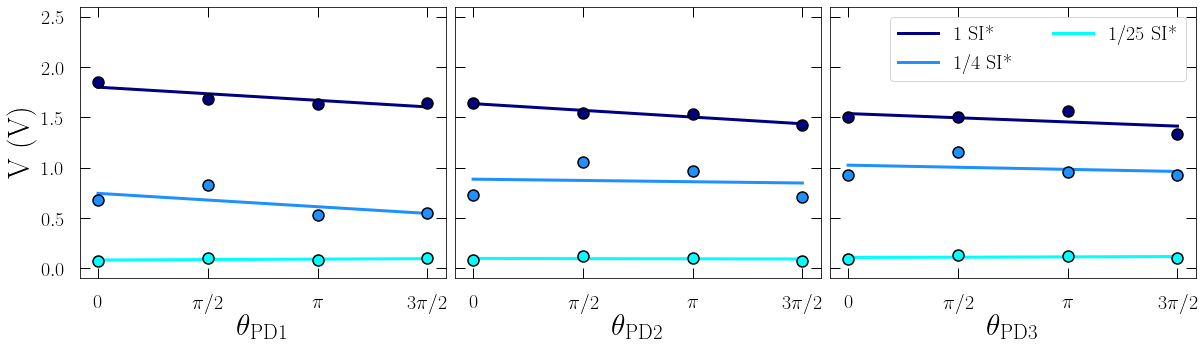

In [228]:
PD30P1 = []
PD30P2 = []
PD30P5 = []
PD10P1 = []
PD10P2 = []
PD10P5 = []
PD20P1 = []
PD20P2 = []
PD20P5 = []

for i in range(62):
    #PD3
    if data[i,0] == float(1) and data[i,2] == 45:
        if data[i,1] == float(0.1):
            PD30P1.append(data[i,2:5].tolist())
        if data[i,1] == float(0.2):
            PD30P2.append(data[i,2:5].tolist())
        if data[i,1] == float(0.5):
            PD30P5.append(data[i,2:5].tolist())
    #PD1
    elif data[i,0] == 2 and data[i,2] == 45:
        if data[i,1] == 0.1:
            PD10P1.append(data[i,2:5].tolist())
        if data[i,1] == 0.2:
            PD10P2.append(data[i,2:5].tolist())
        if data[i,1] == 0.5:
            PD10P5.append(data[i,2:5].tolist())
    #PD2
    elif data[i,0] == 3 and data[i,2] == 45:
        if data[i,1] == 0.1:
             PD20P1.append(data[i,2:5].tolist())
    
        if data[i,1] == 0.2:
             PD20P2.append(data[i,2:5].tolist())
            
        if data[i,1] == 0.5:
             PD20P5.append(data[i,2:5].tolist())
    


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 15


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=30

#format axis labels
x_locator = FixedLocator([0,90, 180, 270])
x_formatter = FixedFormatter([0,r'$\pi/2$',r'$\pi$', r'$3\pi/2$'])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

fig.subplots_adjust(hspace=0.025, wspace=0.025)

fig.set_facecolor('w')
for i in range(0,len(axes)):
    axes[i].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].xaxis.set_major_formatter(x_formatter)
    axes[i].xaxis.set_major_locator(x_locator)
#     axes[i,j].yaxis.set_major_formatter(y_formatter)
#     axes[i,j].yaxis.set_major_locator(y_locator)
    axes[i].set_xlim(-15,285)
    axes[i].set_ylim(-0.1,2.6)
    
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
        
PD30P1 = array(PD30P1)[numpy.argsort(array(PD30P1)[:, 1])]
PD30P2 = array(PD30P2)[numpy.argsort(array(PD30P1)[:, 1])]
PD30P5 = array(PD30P5)[numpy.argsort(array(PD30P5)[:, 1])]
PD10P1 = array(PD10P1)[numpy.argsort(array(PD10P1)[:, 1])]
PD10P2 = array(PD10P2)[numpy.argsort(array(PD10P2)[:, 1])]
PD10P5 = array(PD10P5)[numpy.argsort(array(PD10P5)[:, 1])]
PD20P1 = array(PD20P1)[numpy.argsort(array(PD20P1)[:, 1])]
PD20P2 = array(PD20P2)[numpy.argsort(array(PD20P2)[:, 1])]
PD20P5 = array(PD20P5)[numpy.argsort(array(PD20P5)[:, 1])]
x= linspace(0, 270, 1000)
        

def func(x, a, b):
    return a * x + b

def cf(xf, yf, a, b):
    p = p0=[a, b]

    popt, pcov = curve_fit(func, xf, yf, p0 = p)
    
    return popt
    
#plot1

axes[0].plot(PD30P1[:,1], PD30P1[:,2]/1000,'.',color='navy',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0].plot(PD30P2[:,1], PD30P2[:,2]/1000,'.',color='dodgerblue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0].plot(PD30P5[:,1], PD30P5[:,2]/1000,'.',color='cyan',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

axes[0].plot(x, func(x, *cf(PD30P1[:,1], PD30P1[:,2]/1000, 0, 1)), color='navy', lw =3)
axes[0].plot(x, func(x, *cf(PD30P2[:,1], PD30P2[:,2]/1000, 0, 1)), color='dodgerblue', lw =3)
axes[0].plot(x, func(x, *cf(PD30P5[:,1], PD30P5[:,2]/1000, 0, 1)), color='cyan', lw =3)

#plot2
axes[1].plot(PD10P1[:,1], PD10P1[:,2]/1000,'.',color='navy',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[1].plot(PD10P2[:,1], PD10P2[:,2]/1000,'.',color='dodgerblue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[1].plot(PD10P5[:,1], PD10P5[:,2]/1000,'.',color='cyan',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

axes[1].plot(x, func(x, *cf(PD10P1[:,1], PD10P1[:,2]/1000, 0, 1)), color='navy', lw =3)
axes[1].plot(x, func(x, *cf(PD10P2[:,1], PD10P2[:,2]/1000, 0, 1)), color='dodgerblue', lw =3)
axes[1].plot(x, func(x, *cf(PD10P5[:,1], PD10P5[:,2]/1000, 0, 1)), color='cyan', lw =3)

#plot3
axes[2].plot(PD20P1[:,1], PD20P1[:,2]/1000,'.',color='navy',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[2].plot(PD20P2[:,1], PD20P2[:,2]/1000,'.',color='dodgerblue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[2].plot(PD20P5[:,1], PD20P5[:,2]/1000,'.',color='cyan',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

axes[2].plot(x, func(x, *cf(PD20P1[:,1], PD20P1[:,2]/1000, 0, 1)), color='navy', lw =3, label = '1 SI*')
axes[2].plot(x, func(x, *cf(PD20P2[:,1], PD20P2[:,2]/1000, 0, 1)), color='dodgerblue', lw =3, label = '1/4 SI*')
axes[2].plot(x, func(x, *cf(PD20P5[:,1], PD20P5[:,2]/1000, 0, 1)), color='cyan', lw =3, label = '1/25 SI*')

#labels
axes[0].set_xlabel(r'$\theta_{\text{PD1}}$', fontsize = labelfont)
axes[1].set_xlabel(r'$\theta_{\text{PD2}}$', fontsize = labelfont)
axes[2].set_xlabel(r'$\theta_{\text{PD3}}$', fontsize = labelfont)
axes[0].set_ylabel('V (V)', fontsize = labelfont)
axes[2].legend(ncol = 2, fontsize = legfont)

#plt.title('insert', fontsize = 30)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


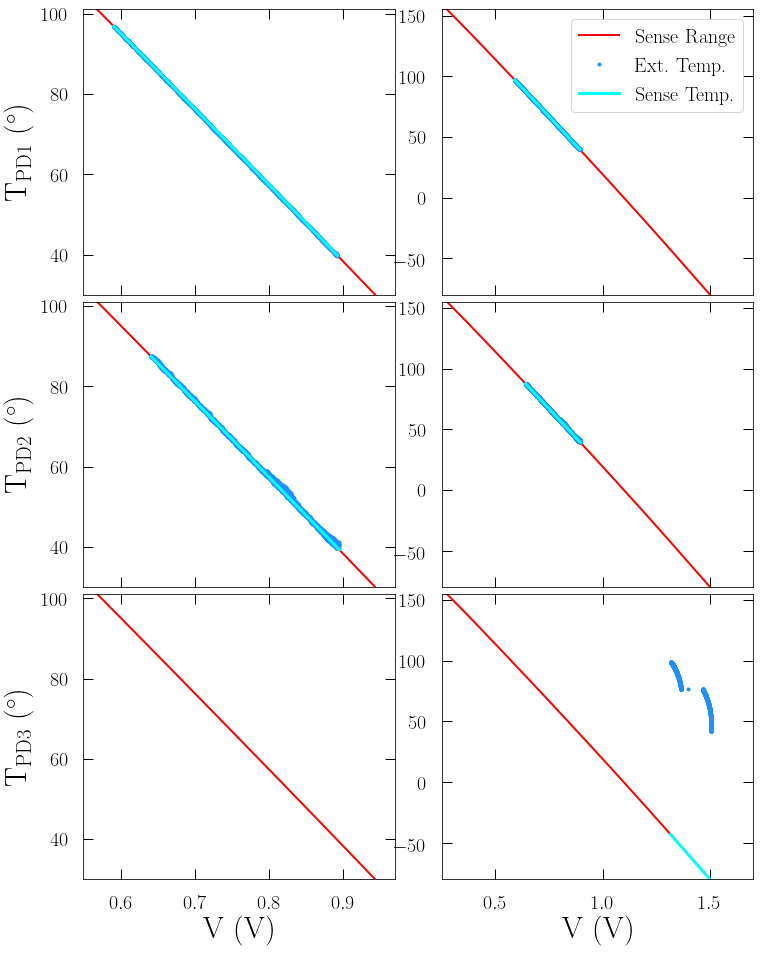

In [57]:
%pylab inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 10


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=30

#format axis labels
x_locator = FixedLocator([0,90, 180, 270])
x_formatter = FixedFormatter([0,r'$\pi/2$',r'$\pi$', r'$3\pi/2$'])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))

fig.subplots_adjust(hspace=0.025, wspace=0.15)

fig.set_facecolor('w')
for i in range(3):
    for j in range(2):
        axes[i,j].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
        axes[i,j].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
        axes[i,j].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
        axes[i,j].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
        #axes.xaxis.set_major_formatter(x_formatter)
        #axes.xaxis.set_major_locator(x_locator)
        #     axes[i,j].yaxis.set_major_formatter(y_formatter)
        #     axes[i,j].yaxis.set_major_locator(y_locator)
        axes[i,0].set_xlim(0.55,0.97)
        axes[i,0].set_ylim(30,101.05)
        axes[i,1].set_xlim(0.25,1.7)
        axes[i,1].set_ylim(-80,155)
        axes[0,j].set_xticklabels([])
        axes[1,j].set_xticklabels([])
    

    
y_array_T_PD2 = load('20200808_2254_temp.npy')
y_array_V_PD2 = load('20200808_2254_voltage.npy')
y_array_T_PD1 = load('20200809_1200_temp.npy')
y_array_V_PD1 = load('20200809_1200_voltage.npy')
y_array_T_PD3 = load('20200809_1400_temp.npy')
y_array_V_PD3 = load('20200809_1400_voltage.npy')

sort_array_PD2 = numpy.argsort(array(y_array_V_PD2))
sort_array_PD1 = numpy.argsort(array(y_array_V_PD1))
sort_array_PD3 = numpy.argsort(array(y_array_V_PD3))

y_array_V_PD2 = array(y_array_V_PD2)[sort_array_PD2]
y_array_T_PD2 = array(y_array_T_PD2)[sort_array_PD2]
y_array_V_PD1 = array(y_array_V_PD1)[sort_array_PD1]
y_array_T_PD1 = array(y_array_T_PD1)[sort_array_PD1]
y_array_V_PD3 = array(y_array_V_PD3)[sort_array_PD3]
y_array_T_PD3 = array(y_array_T_PD3)[sort_array_PD3]


def f(x):
    V_tao = [1375.219, 1350.441,1300.593,1250.398,1199.884,1149.070,1097.987,1046.647,995.050,943.227,891.178,838.882,786.36,733.608,680.654,627.49,574.117,520.551,466.76,412.739,358.164,302.785]
    slope = [4.958,4.976,5.002,5.036,5.066,5.108,5.121,5.134,5.171,5.194,5.217,5.241,5.264,5.285,5.306,5.327,5.347,5.368,5.391,5.43,5.498,5.538]
    temps = [-55,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
    
    V_tao = array(V_tao)
    slope = array(slope)*-1
    temps = array(temps)
    
    temp = []
    
    for i in range(len(x)):
        if (x[i] >= V_tao[0] +(temps[1]-temps[0])/2*slope[0]):
            temp.append(temps[0]+ (x[i]-V_tao[0])/slope[0])
        elif (x[i] <= V_tao[-1] -(10)/2 * slope[-1]):
            temp.append(temps[-1]+ (x[i]-V_tao[-1])/slope[-1])
        else:    
            for j in range(len(V_tao)-2):
                j = j+1
                if (x[i] >= V_tao[j] +(temps[j+1]-temps[j])/2 * slope[j]) and (x[i] < V_tao[j] -(temps[j]-temps[j-1])/2 * slope[j]):
                    temp.append(temps[j]+ (x[i]-V_tao[j])/slope[j])
            
    return temp
            
reference = linspace(0, 2000, 100)
axes[0,0].plot(reference/1000, f(reference), color='red', lw =2,label='Sense Range')
axes[0,0].plot(y_array_V_PD1/1000, y_array_T_PD1, '.', color='dodgerblue', lw =2,label='Ext. Temp.')
axes[0,0].plot(y_array_V_PD1/1000, f(y_array_V_PD1), color='cyan', lw =3, label = 'Sense Temp.')

axes[0,1].plot(reference/1000, f(reference), color='red', lw =2,label='Sense Range')
axes[0,1].plot(y_array_V_PD1/1000, y_array_T_PD1, '.', color='dodgerblue', lw =2,label='Ext. Temp.')
axes[0,1].plot(y_array_V_PD1/1000, f(y_array_V_PD1), color='cyan', lw =3, label = 'Sense Temp.')

axes[1,0].plot(reference/1000, f(reference), color='red', lw =2,label='range')
axes[1,0].plot(y_array_V_PD2/1000, y_array_T_PD2, '.', color='dodgerblue', lw =2,label='Temperature')
axes[1,0].plot(y_array_V_PD2/1000, f(y_array_V_PD2), color='cyan', lw =3, label = 'Sense Chip Temp')

axes[1,1].plot(reference/1000, f(reference), color='red', lw =2,label='range')
axes[1,1].plot(y_array_V_PD2/1000, y_array_T_PD2, '.', color='dodgerblue', lw =2,label='Temperature')
axes[1,1].plot(y_array_V_PD2/1000, f(y_array_V_PD2), color='cyan', lw =3, label = 'Sense Chip Temp')

axes[2,0].plot(reference/1000, f(reference), color='red', lw =2,label='range')
axes[2,0].plot(y_array_V_PD3/1000, y_array_T_PD3, '.', color='dodgerblue', lw =2,label='Temperature')
axes[2,0].plot(y_array_V_PD3/1000, f(y_array_V_PD3), color='cyan', lw =3, label = 'Sense Chip Temp')

axes[2,1].plot(reference/1000, f(reference), color='red', lw =2,label='range')
axes[2,1].plot(y_array_V_PD3/1000, y_array_T_PD3, '.', color='dodgerblue', lw =2,label='Temperature')
axes[2,1].plot(y_array_V_PD3/1000, f(y_array_V_PD3), color='cyan', lw =3, label = 'Sense Chip Temp')

axes[2,0].set_xlabel('V (V)', fontsize = labelfont)
axes[2,1].set_xlabel('V (V)', fontsize = labelfont)
axes[0,0].set_ylabel(r'T$_{\text{PD1}}$ ($^\circ$)', fontsize = labelfont)
axes[1,0].set_ylabel(r'T$_{\text{PD2}}$ ($^\circ$)', fontsize = labelfont)
axes[2,0].set_ylabel(r'T$_{\text{PD3}}$ ($^\circ$)', fontsize = labelfont)

axes[0,1].legend(fontsize = legfont)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  after removing the cwd from sys.path.


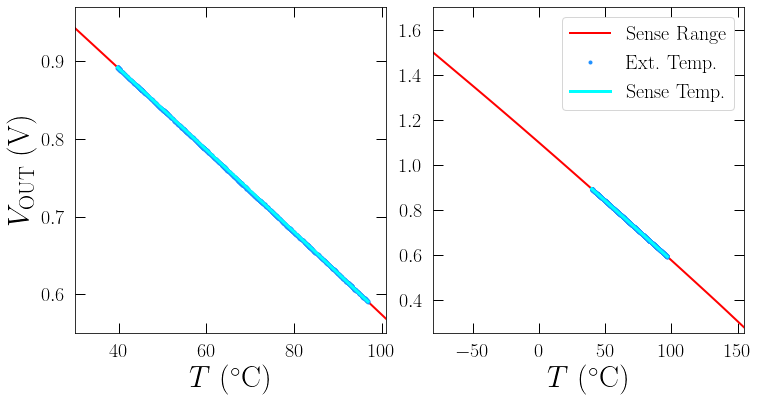

In [17]:
%pylab inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 10


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=30

#format axis labels
x_locator = FixedLocator([0,90, 180, 270])
x_formatter = FixedFormatter([0,r'$\pi/2$',r'$\pi$', r'$3\pi/2$'])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

fig.subplots_adjust(hspace=0.025, wspace=0.15)

fig.set_facecolor('w')
for j in range(2):
    axes[j].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[j].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[j].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[j].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    #axes.xaxis.set_major_formatter(x_formatter)
    #axes.xaxis.set_major_locator(x_locator)
    #     axes[i,j].yaxis.set_major_formatter(y_formatter)
    #     axes[i,j].yaxis.set_major_locator(y_locator)
    axes[0].set_ylim(0.55,0.97)
    axes[0].set_xlim(30,101.05)
    axes[1].set_ylim(0.25,1.7)
    axes[1].set_xlim(-80,155)
    

    
y_array_T_PD2 = load('20200808_2254_temp.npy')
y_array_V_PD2 = load('20200808_2254_voltage.npy')
y_array_T_PD1 = load('20200809_1200_temp.npy')
y_array_V_PD1 = load('20200809_1200_voltage.npy')
y_array_T_PD3 = load('20200809_1400_temp.npy')
y_array_V_PD3 = load('20200809_1400_voltage.npy')

sort_array_PD2 = numpy.argsort(array(y_array_V_PD2))
sort_array_PD1 = numpy.argsort(array(y_array_V_PD1))
sort_array_PD3 = numpy.argsort(array(y_array_V_PD3))

y_array_V_PD2 = array(y_array_V_PD2)[sort_array_PD2]
y_array_T_PD2 = array(y_array_T_PD2)[sort_array_PD2]
y_array_V_PD1 = array(y_array_V_PD1)[sort_array_PD1]
y_array_T_PD1 = array(y_array_T_PD1)[sort_array_PD1]
y_array_V_PD3 = array(y_array_V_PD3)[sort_array_PD3]
y_array_T_PD3 = array(y_array_T_PD3)[sort_array_PD3]


def f(x):
    V_tao = [1375.219, 1350.441,1300.593,1250.398,1199.884,1149.070,1097.987,1046.647,995.050,943.227,891.178,838.882,786.36,733.608,680.654,627.49,574.117,520.551,466.76,412.739,358.164,302.785]
    slope = [4.958,4.976,5.002,5.036,5.066,5.108,5.121,5.134,5.171,5.194,5.217,5.241,5.264,5.285,5.306,5.327,5.347,5.368,5.391,5.43,5.498,5.538]
    temps = [-55,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
    
    V_tao = array(V_tao)
    slope = array(slope)*-1
    temps = array(temps)
    
    temp = []
    
    for i in range(len(x)):
        if (x[i] >= V_tao[0] +(temps[1]-temps[0])/2*slope[0]):
            temp.append(temps[0]+ (x[i]-V_tao[0])/slope[0])
        elif (x[i] <= V_tao[-1] -(10)/2 * slope[-1]):
            temp.append(temps[-1]+ (x[i]-V_tao[-1])/slope[-1])
        else:    
            for j in range(len(V_tao)-2):
                j = j+1
                if (x[i] >= V_tao[j] +(temps[j+1]-temps[j])/2 * slope[j]) and (x[i] < V_tao[j] -(temps[j]-temps[j-1])/2 * slope[j]):
                    temp.append(temps[j]+ (x[i]-V_tao[j])/slope[j])
            
    return temp
            
reference = linspace(0, 2000, 100)
axes[0].plot(f(reference), reference/1000,  color='red', lw =2,label='Sense Range')
axes[0].plot( y_array_T_PD1,y_array_V_PD1/1000, '.', color='dodgerblue', lw =2,label='Ext. Temp.')
axes[0].plot( f(y_array_V_PD1),y_array_V_PD1/1000, color='cyan', lw =3, label = 'Sense Temp.')

axes[1].plot(f(reference), reference/1000, color='red', lw =2,label='Sense Range')
axes[1].plot(y_array_T_PD1,y_array_V_PD1/1000, '.', color='dodgerblue', lw =2,label='Ext. Temp.')
axes[1].plot( f(y_array_V_PD1), y_array_V_PD1/1000,color='cyan', lw =3, label = 'Sense Temp.')


axes[0].set_ylabel(r'$V_{\text{OUT}}$ (V)', fontsize = labelfont)
axes[1].set_xlabel(r'$T$ ($^\circ$C)', fontsize = labelfont)
axes[0].set_xlabel(r'$T$ ($^\circ$C)', fontsize = labelfont)

axes[1].legend(fontsize = legfont)
plt.savefig("TempSense.png", dpi=400)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  after removing the cwd from sys.path.


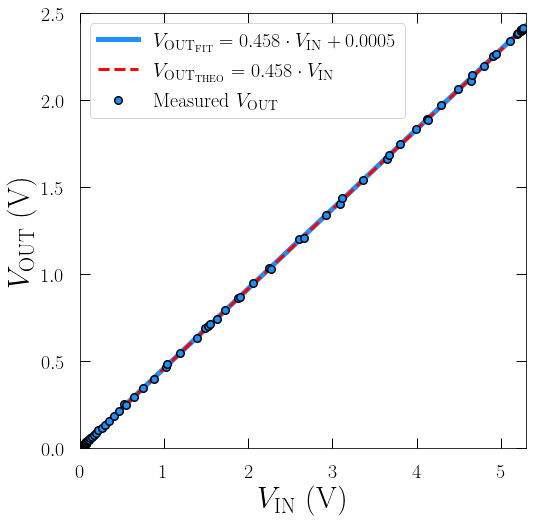

In [5]:
%pylab inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 15


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=30

#format axis labels
x_locator = FixedLocator([0,90, 180, 270])
x_formatter = FixedFormatter([0,r'$\pi/2$',r'$\pi$', r'$3\pi/2$'])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
fig.subplots_adjust(hspace=0.025, wspace=0.025)
fig.set_facecolor('w')

y_array_V = load('20200809_1700_voltage1.npy')
y_array_v = load('20200809_1700_voltage2.npy')
                    
axes.tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
axes.tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
axes.tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
axes.tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
#axes.xaxis.set_major_formatter(x_formatter)
#axes.xaxis.set_major_locator(x_locator)
#     axes[i,j].yaxis.set_major_formatter(y_formatter)
#     axes[i,j].yaxis.set_major_locator(y_locator)
axes.set_xlim(-0,5.3)
axes.set_ylim(-0,2.5)
    
sort_array = numpy.argsort(array(y_array_V))
y_array_V = array(y_array_V)[sort_array]
y_array_v = array(y_array_v)[sort_array]
x= linspace(-1000, 6000, 6000)
        

def func(x, a, b):
    return a * x + b

def cf(xf, yf, a, b):
    p = p0=[a, b]

    popt, pcov = curve_fit(func, xf, yf, p0 = p)
    
    return popt
    
#plot1

axes.plot(x/1000, func(x/1000, *cf(y_array_V/1000, y_array_v/1000, 0, 0)),color='dodgerblue',lw=5,zorder=3, label = r'$V_{\text{OUT}_{\text{FIT}}}=0.458\cdot V_{\text{IN}}+0.0005$')
axes.plot(x/1000, 845/1845*x/1000,'--',color='red',lw=3,zorder=3, label = r'$V_{\text{OUT}_{\text{THEO}}}=0.458\cdot V_{\text{IN}}$')
axes.plot(y_array_V/1000, y_array_v/1000,'.',color='dodgerblue',markeredgewidth=1.5, markeredgecolor='k',markersize=15,zorder=3, label = r'Measured $V_{\text{OUT}}$')




#labels
axes.set_xlabel(r'$V_{\text{IN}}$ (V)', fontsize = labelfont)
axes.set_ylabel(r'$V_{\text{OUT}}$ (V)', fontsize = labelfont)
axes.legend(ncol = 1, fontsize = legfont)
plt.savefig("VoltageSense.png", dpi=400)
#plt.title('insert', fontsize = 30)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  after removing the cwd from sys.path.


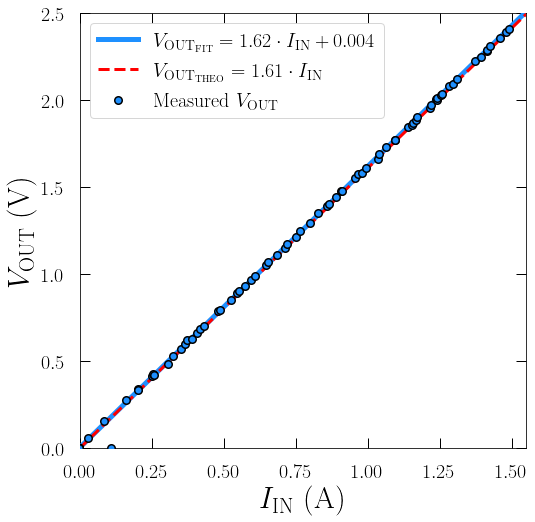

In [4]:
%pylab inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 15


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=30

#format axis labels
x_locator = FixedLocator([0,90, 180, 270])
x_formatter = FixedFormatter([0,r'$\pi/2$',r'$\pi$', r'$3\pi/2$'])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
fig.subplots_adjust(hspace=0.025, wspace=0.025)
fig.set_facecolor('w')

y_array_V = load('20200812_2150_voltage1.npy')
y_array_c = load('20200812_2150_current2.npy')
                    
axes.tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
axes.tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
axes.tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
axes.tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
#axes.xaxis.set_major_formatter(x_formatter)
#axes.xaxis.set_major_locator(x_locator)
#     axes[i,j].yaxis.set_major_formatter(y_formatter)
#     axes[i,j].yaxis.set_major_locator(y_locator)
axes.set_xlim(-0,1.55)
axes.set_ylim(-0,2.5)
    
sort_array = numpy.argsort(array(y_array_c))
y_array_V = array(y_array_V)[sort_array]
y_array_c = array(y_array_c)[sort_array]
x= linspace(-1000, 6000, 6000)
        

def func(x, a, b):
    return a * x + b

def cf(xf, yf, a, b):
    p = p0=[a, b]

    popt, pcov = curve_fit(func, xf, yf, p0 = p)
    
    return popt
    
#plot1

axes.plot(x/1000, func(x/1000, *cf(y_array_c/1000, y_array_V/1000, 0, 0)),color='dodgerblue',lw=5,zorder=3, label = r'$V_{\text{OUT}_{\text{FIT}}}=1.62\cdot I_{\text{IN}}+0.004$')
axes.plot(x/1000, 1.61*x/1000,'--',color='red',lw=3,zorder=3, label = r'$V_{\text{OUT}_{\text{THEO}}}=1.61\cdot I_{\text{IN}}$')
axes.plot(y_array_c/1000, y_array_V/1000,'.',color='dodgerblue',markeredgewidth=1.5, markeredgecolor='k',markersize=15,zorder=3, label = r'Measured $V_{\text{OUT}}$')




#labels
axes.set_xlabel(r'$I_{\text{IN}}$ (A)', fontsize = labelfont)
axes.set_ylabel(r'$V_{\text{OUT}}$ (V)', fontsize = labelfont)
axes.legend(ncol = 1, fontsize = legfont)

#plt.title('insert', fontsize = 30
plt.savefig("CurrentSense.png", dpi=400)

In [3]:
def convertTemp(x):
    V_tao = [1375.219, 1350.441,1300.593,1250.398,1199.884,1149.070,1097.987,1046.647,995.050,943.227,891.178,838.882,786.36,733.608,680.654,627.49,574.117,520.551,466.76,412.739,358.164,302.785]
    slope = [4.958,4.976,5.002,5.036,5.066,5.108,5.121,5.134,5.171,5.194,5.217,5.241,5.264,5.285,5.306,5.327,5.347,5.368,5.391,5.43,5.498,5.538]
    temps = [-55,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
    
    V_tao = array(V_tao)
    slope = array(slope)*-1
    temps = array(temps)
    
    temp = []
    
    for i in range(len(x)):
        if (x[i] >= V_tao[0] +(temps[1]-temps[0])/2*slope[0]):
            temp.append(temps[0]+ (x[i]-V_tao[0])/slope[0])
        elif (x[i] <= V_tao[-1] -(10)/2 * slope[-1]):
            temp.append(temps[-1]+ (x[i]-V_tao[-1])/slope[-1])
        else:    
            for j in range(len(V_tao)-2):
                j = j+1
                if (x[i] >= V_tao[j] +(temps[j+1]-temps[j])/2 * slope[j]) and (x[i] < V_tao[j] -(temps[j]-temps[j-1])/2 * slope[j]):
                    temp.append(temps[j]+ (x[i]-V_tao[j])/slope[j])
            
    return temp

In [17]:
convertTemp(np.array([990,998]))

[20.97660027074066, 19.42951073293366]

In [5]:
def volt2temp(x):
    V_tao = [1375.219, 1350.441,1300.593,1250.398,1199.884,1149.070,1097.987,1046.647,995.050,943.227,891.178,838.882,786.36,733.608,680.654,627.49,574.117,520.551,466.76,412.739,358.164,302.785]
    slope = [4.958,4.976,5.002,5.036,5.066,5.108,5.121,5.134,5.171,5.194,5.217,5.241,5.264,5.285,5.306,5.327,5.347,5.368,5.391,5.43,5.498,5.538]
    temps = [-55,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
    print(len(temps))
    V_tao = array(V_tao)
    slope = array(slope)*-1
    temps = array(temps)
    
    temp = []
    
    for i in range(len(x)):
        if (x[i] >= V_tao[0] +(temps[1]-temps[0])/2*slope[0]):
            temp.append(temps[0]+ (x[i]-V_tao[0])/slope[0])
        elif (x[i] <= V_tao[-1] -(10)/2 * slope[-1]):
            temp.append(temps[-1]+ (x[i]-V_tao[-1])/slope[-1])
        else:    
            for j in range(len(V_tao)-2):
                j = j+1
                if (x[i] >= V_tao[j] +(temps[j+1]-temps[j])/2 * slope[j]) and (x[i] < V_tao[j] -(temps[j]-temps[j-1])/2 * slope[j]):
                    temp.append(temps[j]+ (x[i]-V_tao[j])/slope[j])
            
    return temp

In [6]:
volt2temp(2)

22


NameError: name 'array' is not defined